# Customer Transaction Prediction


## objectives

The objective of this project is to built a model that predicts whether a customer will make
a transaction in the future

### Importing required libraries

In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [2]:
df=pd.read_csv('train(1).csv')
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


# 1.>Data analysis report

#### Basic checks for understanding data`

In [3]:
df.shape

(200000, 202)

In [4]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


#### Checking the missing values

In [6]:
missing_values=df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values>0]

Series([], dtype: int64)

Their are no null values 

##### checking target distribution

In [7]:
df['target'].value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

In [8]:
df['target'].value_counts(normalize=True)*100

target
0    89.951
1    10.049
Name: proportion, dtype: float64

#### Understanding target distribution by visualisation

<Axes: xlabel='target', ylabel='count'>

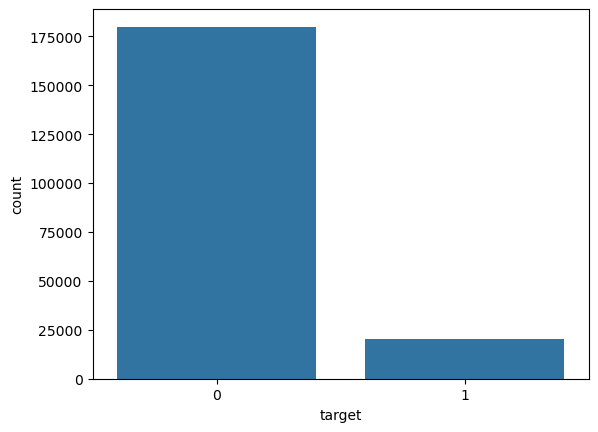

In [9]:
sns.countplot(x=df.target)

# 2.> Machine learning

#### Train-Test-Split

we have to separate target variable from data then we will train the data and test the data

In [10]:
x=df.drop(columns=['target','ID_code'],axis=1)

In [11]:
y=df['target']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Feature Scaling

Feature Scaling Brings all features to the same scale

In [13]:
scaler=StandardScaler()

In [14]:
x_train_scaled=scaler.fit_transform(x_train)

In [15]:
x_test_scaled=scaler.transform(x_test)

#### Logistic Regression

In [103]:
lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)

LogisticRegression()

In [130]:
y_pred=lr.predict(x_test_scaled)

In [131]:
y_prob=lr.predict_proba(x_test_scaled)[:,-1]

In [106]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     36043
           1       0.70      0.27      0.39      3957

    accuracy                           0.92     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.92      0.90     40000



In [107]:
print(confusion_matrix(y_test,y_pred))

[[35591   452]
 [ 2891  1066]]


In [108]:
print(roc_auc_score(y_test,y_prob))

0.8640869047052867


#### Random Forest

In [52]:
rf=RandomForestClassifier(n_estimators=50,max_depth=8,n_jobs=1)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=50, n_jobs=1)

In [53]:
y_pred_rf=rf.predict(x_test)

In [54]:
y_prob_rf=rf.predict_proba(x_test)[:,-1]

In [132]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     36043
           1       0.00      0.00      0.00      3957

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000



In [56]:
print(confusion_matrix(y_test,y_pred_rf))

[[36043     0]
 [ 3957     0]]


In [57]:
print(roc_auc_score(y_test,y_prob_rf))

0.7873828378875032


#### Gradient Boosting

In [119]:
gb=HistGradientBoostingClassifier()
gb.fit(x_train,y_train)

HistGradientBoostingClassifier()

In [120]:
y_pred_gb=gb.predict(x_test)

In [121]:
y_prob_gb=gb.predict_proba(x_test)[:,-1]

In [122]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     36043
           1       0.88      0.10      0.19      3957

    accuracy                           0.91     40000
   macro avg       0.90      0.55      0.57     40000
weighted avg       0.91      0.91      0.88     40000



In [123]:
print(confusion_matrix(y_test,y_pred_gb))

[[35988    55]
 [ 3548   409]]


In [124]:
print(roc_auc_score(y_test,y_prob_gb))

0.8668310787151149


#### XGBoost

In [111]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [112]:
y_pred_xgb=xgb.predict(x_test)

In [113]:
y_prob_xgb=xgb.predict_proba(x_test)[:,-1]

In [114]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     36043
           1       0.68      0.26      0.37      3957

    accuracy                           0.91     40000
   macro avg       0.80      0.62      0.66     40000
weighted avg       0.90      0.91      0.90     40000



In [115]:
print(confusion_matrix(y_test,y_pred_xgb))

[[35569   474]
 [ 2943  1014]]


In [116]:
print(roc_auc_score(y_test,y_prob_xgb))

0.8630068200275567


# Model Comparision Report

### Performance Summary

In [133]:
summary=pd.DataFrame({'Models performed':['LogisticRegression','RandomForestClassifier','GradientBoostClassifier','XGBClassifier'],
                     'ROC_AUC_SCORE':[roc_auc_score(y_test,y_prob),roc_auc_score(y_test,y_prob_rf),roc_auc_score(y_test,y_prob_gb),roc_auc_score(y_test,y_prob_xgb)]})

In [134]:
summary

,Models performed,ROC_AUC_SCORE
0,LogisticRegression,0.864087
1,RandomForestClassifier,0.787383
2,GradientBoostClassifier,0.866831
3,XGBClassifier,0.863007


# Challenges Faced